<a href="https://colab.research.google.com/github/diyabhandary/repo1/blob/main/RossmannStoreSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
!pip install numpy pandas matplotlib plotly seaborn --quiet

In [212]:
!pip install jovian opendatasets scikit-learn --upgrade --quiet

In [213]:
import os
import jovian
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [214]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


In [215]:
os.listdir('rossmann-store-sales')

['train.csv', 'sample_submission.csv', 'test.csv', 'store.csv']

In [216]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv',low_memory=False)

In [217]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [218]:
store_df= pd.read_csv('./rossmann-store-sales/store.csv')

In [219]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [220]:
merged_df = ross_df.merge(store_df,how='left',on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [221]:
merged_df.shape

(1017209, 18)

In [222]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')

In [223]:
merged_test_df = test_df.merge(store_df, how='left',on='Store')

In [224]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [225]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [226]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [227]:
merged_df.duplicated().sum()

np.int64(0)

In [228]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [229]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [230]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [231]:
merged_test_df.Date.min(),merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

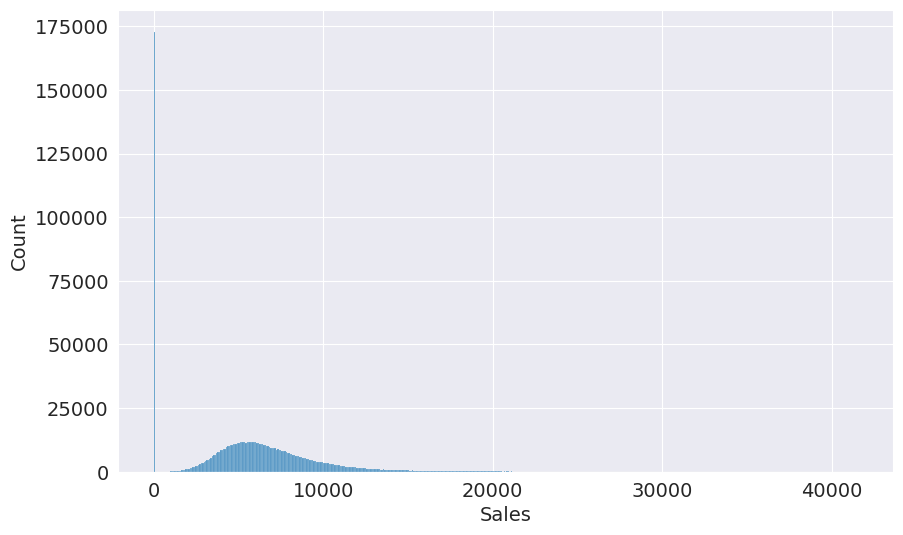

In [232]:
sns.histplot(data=merged_df,x='Sales')

In [233]:
merged_df.Open.value_counts()

,count
Open,
1,844392
0,172817


In [234]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [235]:
merged_df = merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

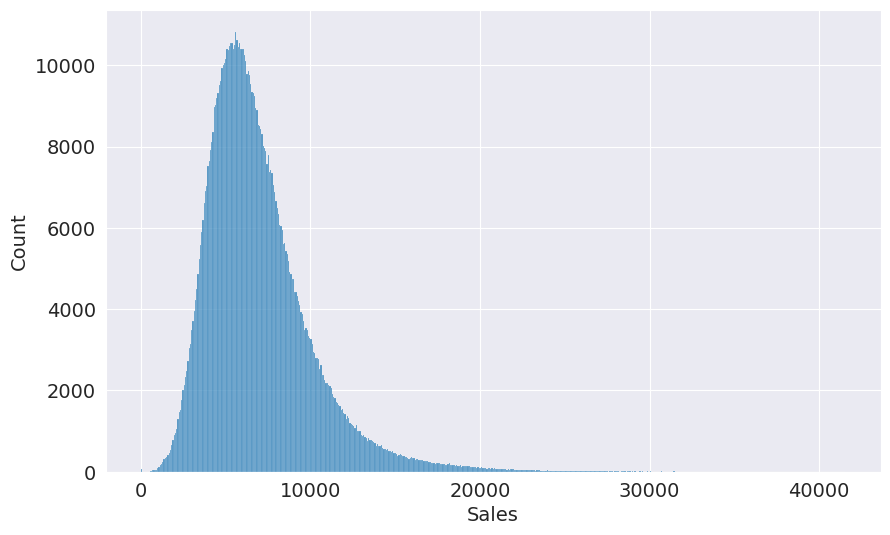

In [236]:
sns.histplot(data=merged_df,x='Sales')

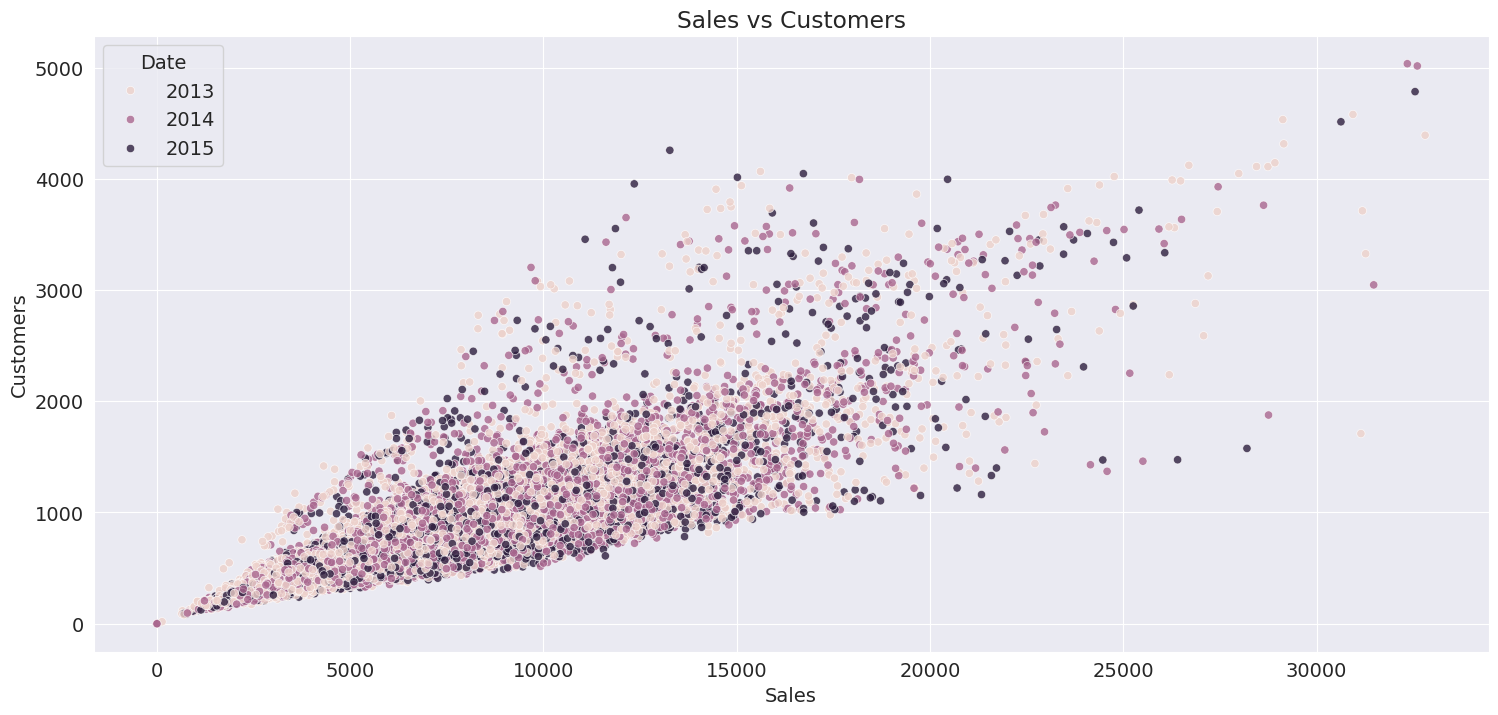

In [237]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title("Sales vs Customers")
plt.show()

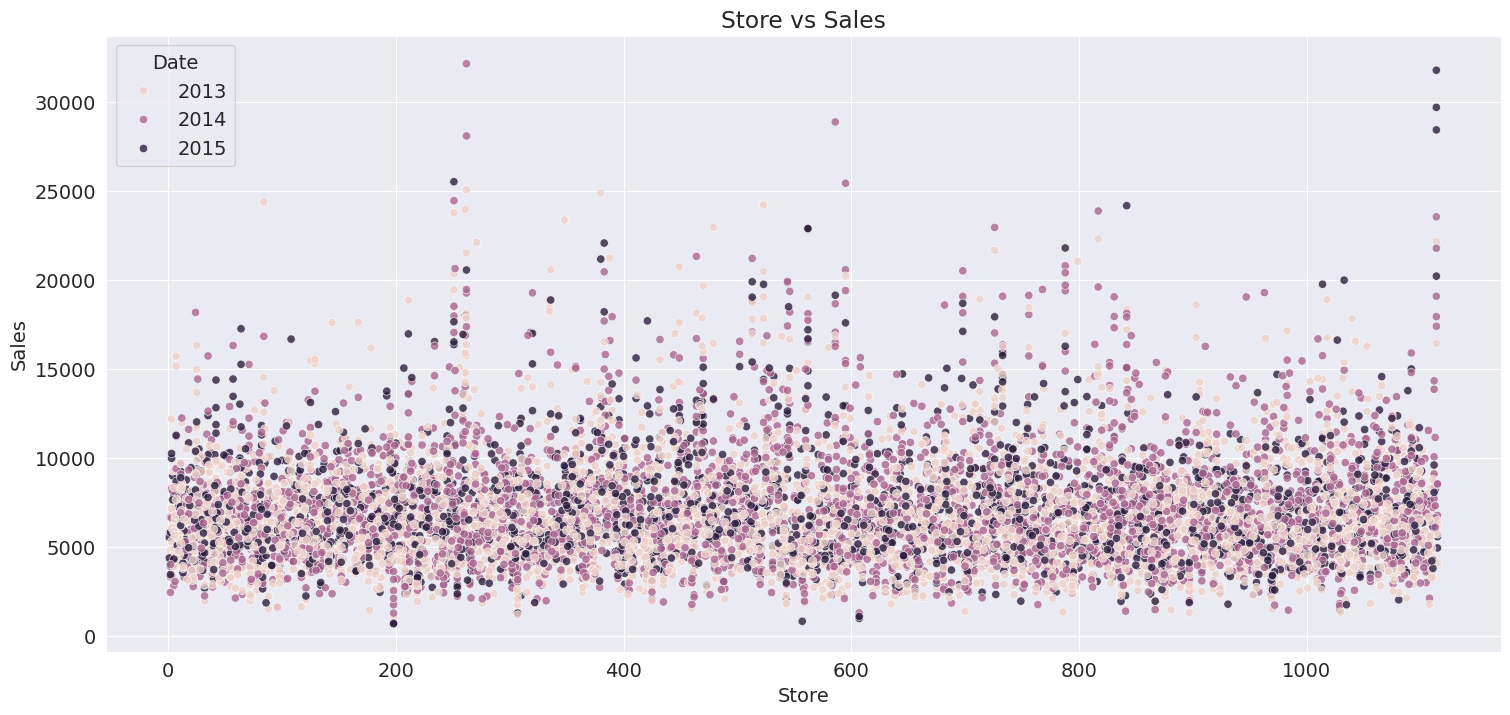

In [238]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store,y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title("Store vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

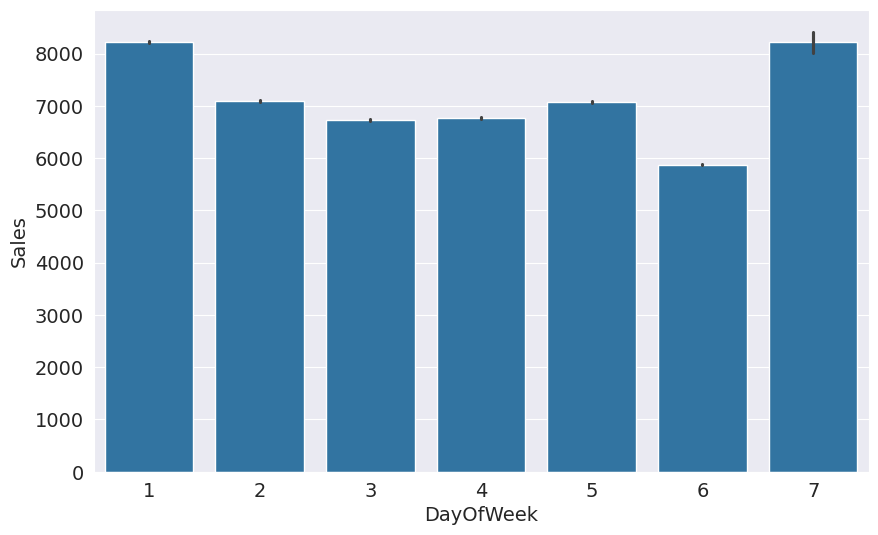

In [239]:
sns.barplot(data=merged_df,x='DayOfWeek',y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

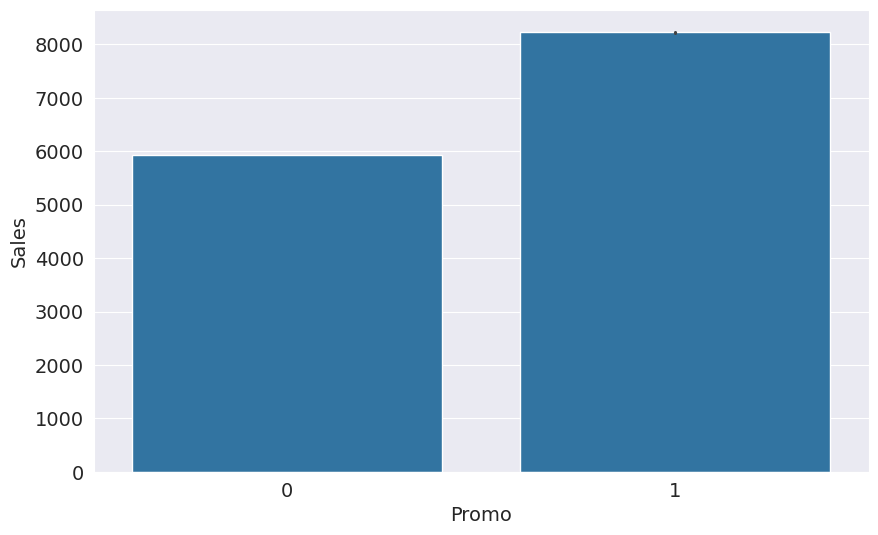

In [240]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

In [241]:
# Convert all columns to numeric where possible
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
numeric_df = merged_df.apply(pd.to_numeric, errors='coerce')

# Now compute correlation safely
numeric_df.corr()['Sales'].sort_values(ascending=False)



,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
Date,0.062757
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396


In [242]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [243]:
merged_df['Day']= merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['year']=merged_df.Date.dt.year

In [244]:
merged_test_df['Day']= merged_test_df.Date.dt.day
merged_test_df['Month']=merged_test_df.Date.dt.month
merged_test_df['year']=merged_test_df.Date.dt.year

<Axes: xlabel='year', ylabel='Sales'>

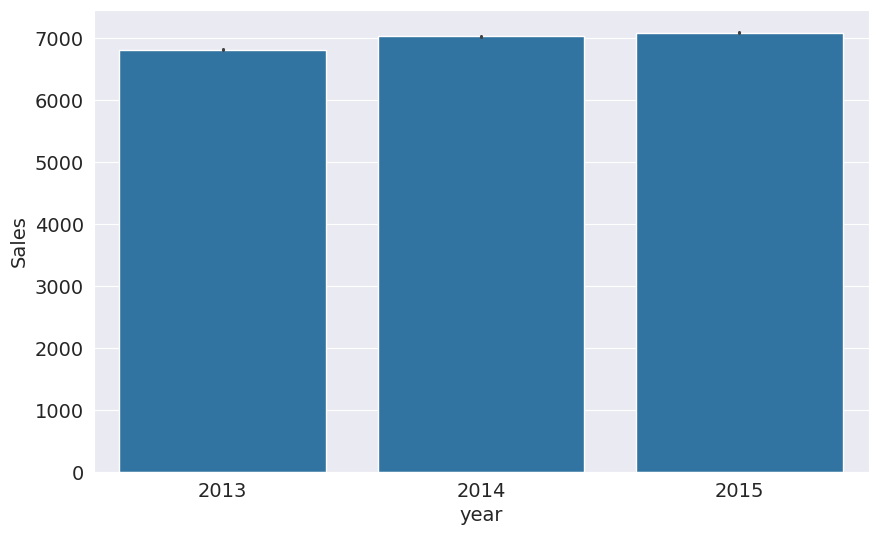

In [245]:
sns.barplot(data=merged_df,x='year',y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

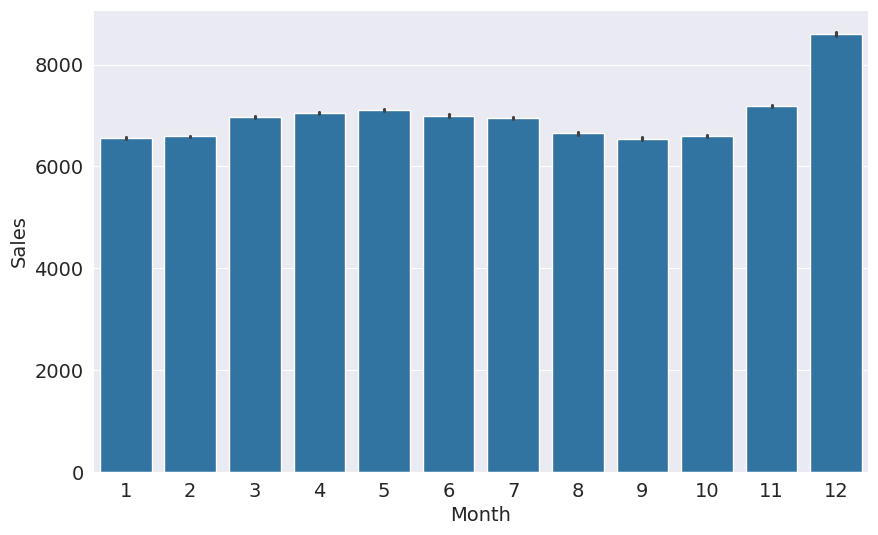

In [246]:
sns.barplot(data=merged_df,x='Month',y='Sales')

In [247]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [248]:
len(merged_df)

844392

In [249]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [250]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size],sorted_df[train_size:]

In [251]:
len(train_df),len(val_df)

(633294, 211098)

In [252]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [253]:
train_df.Date.min(),train_df.Date.max

(Timestamp('2013-01-01 00:00:00'),
 <bound method Series.max of 1017190   2013-01-01
 1016179   2013-01-01
 1016353   2013-01-01
 1016356   2013-01-01
 1016368   2013-01-01
              ...    
 256632    2014-12-10
 256642    2014-12-10
 256634    2014-12-10
 256633    2014-12-10
 256636    2014-12-10
 Name: Date, Length: 633294, dtype: datetime64[ns]>)

In [254]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [255]:
merged_test_df.Date.min(),merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [256]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [257]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'year'],
      dtype='object')

In [258]:
input_cols = ['Store', 'DayOfWeek','Promo','StoreType','Assortment','Day', 'Month', 'year']

In [259]:
target_cols='Sales'

In [260]:
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StoreType,4
Assortment,3
Day,31
Month,12
year,3


In [261]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [262]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [263]:
test_inputs = merged_test_df[input_cols].copy()

In [264]:
numeric_cols = ['Store','Day','Month']
categorical_cols = ['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

In [265]:
from sklearn.impute import SimpleImputer

In [266]:
available_numeric_cols = [col for col in numeric_cols if col in train_inputs.columns]
imputer = SimpleImputer(strategy='mean').fit(train_inputs[available_numeric_cols])


In [267]:
train_inputs[available_numeric_cols] = imputer.transform(train_inputs[available_numeric_cols])
val_inputs[available_numeric_cols] = imputer.transform(val_inputs[available_numeric_cols])
test_inputs[available_numeric_cols] = imputer.transform(test_inputs[available_numeric_cols])


In [268]:
from sklearn.preprocessing import MinMaxScaler

In [269]:
Scaler = MinMaxScaler().fit(train_inputs[available_numeric_cols])


In [270]:
train_inputs[available_numeric_cols] = Scaler.transform(train_inputs[available_numeric_cols])
val_inputs[available_numeric_cols] = Scaler.transform(val_inputs[available_numeric_cols])
test_inputs[available_numeric_cols] = Scaler.transform(test_inputs[available_numeric_cols])

In [271]:
from sklearn.preprocessing import OneHotEncoder

In [272]:


available_categorical_cols = [col for col in categorical_cols if col in train_inputs.columns]
train_inputs[available_categorical_cols] = train_inputs[available_categorical_cols].astype(str)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[available_categorical_cols])


In [273]:
for df in [train_inputs, val_inputs, test_inputs]:
    df[available_categorical_cols] = df[available_categorical_cols].astype(str)

train_encoded = encoder.transform(train_inputs[available_categorical_cols])
val_encoded = encoder.transform(val_inputs[available_categorical_cols])
test_encoded = encoder.transform(test_inputs[available_categorical_cols])

encoded_cols = encoder.get_feature_names_out(available_categorical_cols)

train_inputs[encoded_cols] = train_encoded
val_inputs[encoded_cols] = val_encoded
test_inputs[encoded_cols] = test_encoded



In [274]:
train_inputs

,Store,DayOfWeek,Promo,StoreType,Assortment,Day,Month,year,DayOfWeek_1,DayOfWeek_2,...,DayOfWeek_7,Promo_0,Promo_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,b,b,0.0,0.0,2013,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,b,a,0.0,0.0,2013,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,b,b,0.0,0.0,2013,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,b,a,0.0,0.0,2013,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,b,b,0.0,0.0,2013,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,a,a,0.3,1.0,2014,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0,a,c,0.3,1.0,2014,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0,c,c,0.3,1.0,2014,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0,d,c,0.3,1.0,2014,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [275]:
X_train = train_inputs[available_numeric_cols + list(encoded_cols)]
X_val = val_inputs[available_numeric_cols + list(encoded_cols)]
X_test = test_inputs[available_numeric_cols+list(encoded_cols)]



In [276]:
X_train

,Store,Day,Month,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [277]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [278]:
train_targets.mean()

np.float64(6873.17964168301)

In [279]:
def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [280]:
train_preds = return_mean(X_train)

In [281]:
train_targets

,Sales
1017190,5961
1016179,4220
1016353,6851
1016356,17267
1016368,3102
...,...
256632,6897
256642,15736
256634,7444
256633,5207


In [282]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

In [283]:
from sklearn.metrics import mean_squared_error

In [284]:
import numpy as np
rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
print("RMSE:", rmse)

RMSE: 3082.450443277419


In [285]:
rmse = np.sqrt(mean_squared_error(return_mean(X_val),val_targets))
print("RMSE:", rmse)

RMSE: 3168.6033635047716


In [286]:
merged_df.Sales.min(),merged_df.Sales.max()

(0, 41551)

In [287]:
def guess_random(inputs):
  lo,hi = merged_df.Sales.min(),merged_df.Sales.max()
  lo,hi = 3000,18000
  return np.random.random(len(inputs))*(hi-lo)+lo

In [288]:
train_preds = guess_random(X_train)
train_preds

array([14176.23810148,  7928.93474332,  4651.86534727, ...,
       10192.30739775,  8048.42160459, 14136.19013479])

In [289]:
mse = mean_squared_error(train_preds, train_targets)

# Take square root to get RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 6428.995819178902


In [290]:
mse = mean_squared_error(guess_random(X_val),val_targets)
rmse = np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 6298.248732656237


In [291]:
from sklearn.linear_model import LinearRegression

In [292]:
linreg = LinearRegression()

In [293]:
linreg.fit(X_train,train_targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [294]:
X_train.columns

Index(['Store', 'Day', 'Month', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Promo_0',
       'Promo_1', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [295]:
linreg.coef_

array([ 1.04769128e+02, -1.02969148e+02,  6.36566961e+02,  9.88162437e+02,
       -1.25337913e+02, -3.95143810e+02, -3.97348444e+02, -7.78331197e+00,
       -6.31162237e+01,  5.67266071e-01, -1.13968218e+03,  1.13968218e+03,
       -1.23810698e+03,  4.18081140e+03, -1.34789704e+03, -1.59480738e+03,
        9.42790519e+02, -2.62055874e+03,  1.67776822e+03])

In [296]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7108.34942195, 10576.52241247,  7029.53745648, ...,
        6180.92156718,  5933.91717106,  5555.92201983])

In [297]:
rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
print("RMSE:", rmse)

RMSE: 2742.0797496900427


In [298]:
val_preds = linreg.predict(X_val)
val_preds

array([5556.11011521, 5556.2041629 , 5934.5755049 , ..., 8486.21940865,
       8238.74477408, 7681.08213309])

In [299]:
mse = mean_squared_error(val_preds,val_targets)
rmse = np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 2832.2092297783283


In [300]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [301]:
model = LinearRegression

In [302]:
def try_model(model):
  model.fit(X_train,train_targets)

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)

  train_rmse = mean_squared_error(train_targets,train_preds)
  val_rmse = mean_squared_error(val_targets,val_preds)
  return train_rmse,val_rmse

In [303]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor

In [304]:
try_model(LinearRegression())

(7519001.353660206, 8021409.121241552)

In [305]:
try_model(Ridge())

(7519001.3691757815, 8021400.479688281)

In [306]:
try_model(Lasso())

(7519683.5605739225, 8019351.533365649)

In [307]:
try_model(ElasticNet())

(8290355.374764016, 8860656.456190603)

In [308]:
?ElasticNet

In [309]:
try_model(SGDRegressor())

(7522942.591534126, 7978506.028427706)

In [310]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [311]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 2525906.1576945307)

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.2

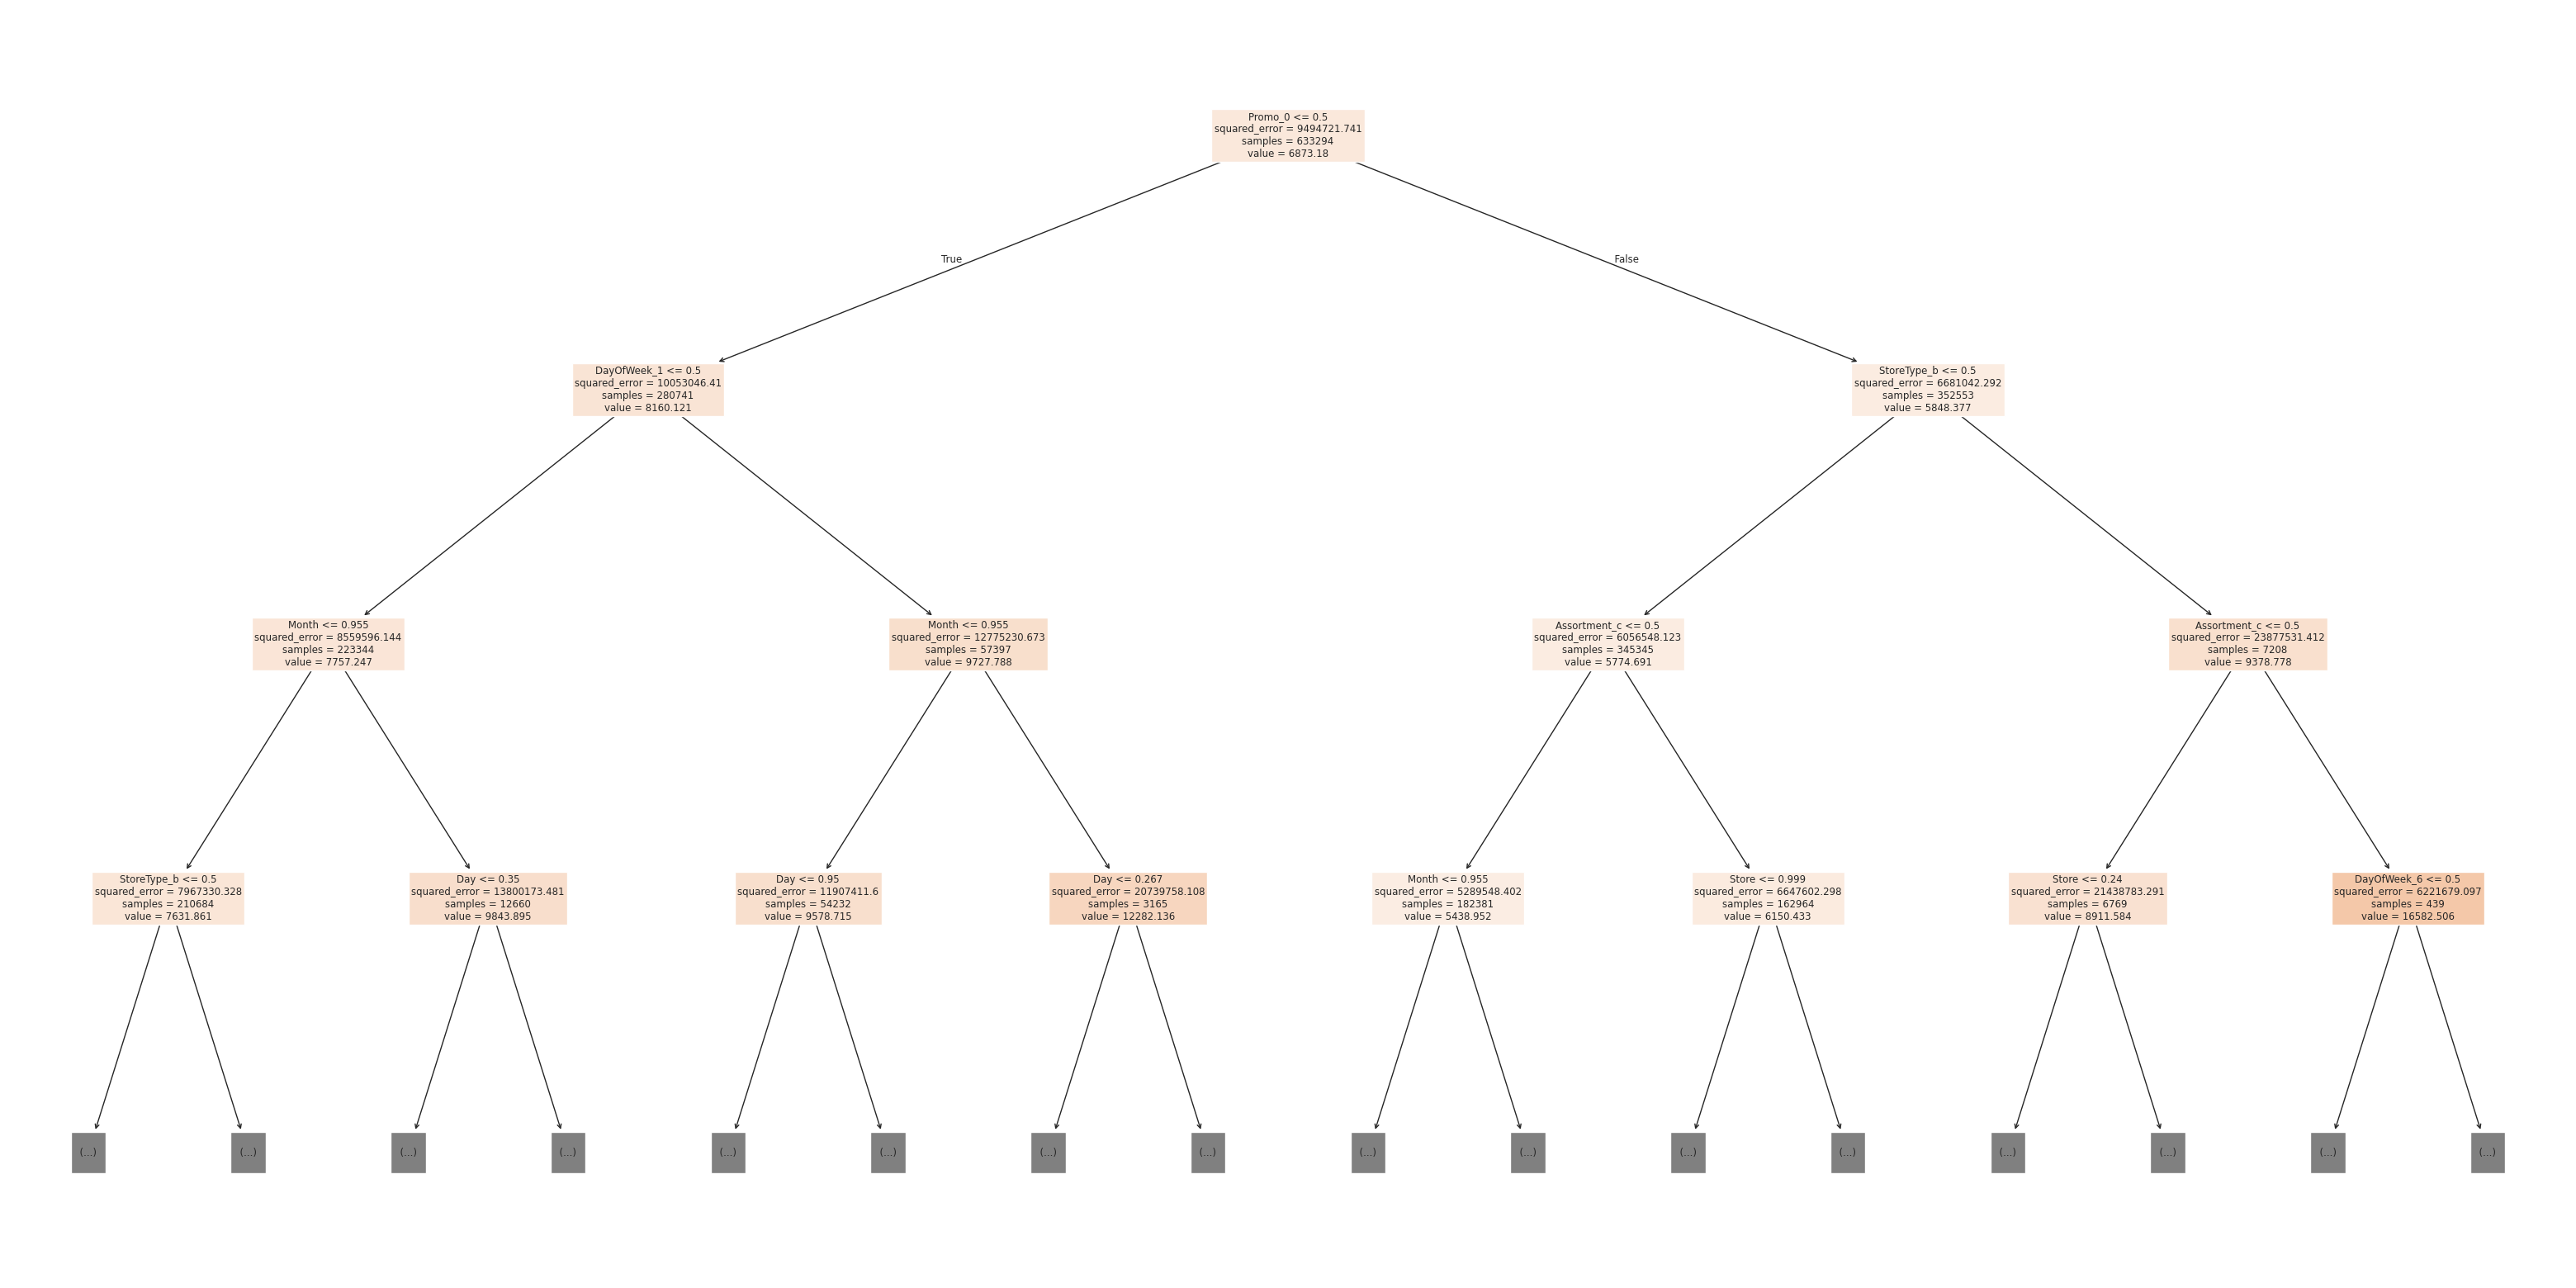

In [312]:
plt.figure(figsize=(40,20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols + list(encoded_cols))


In [313]:
from sklearn.ensemble import RandomForestRegressor

In [314]:
%%time
rf = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=20)
print(try_model(rf))

(284712.2847710898, 2033971.2330527413)
CPU times: user 1min 33s, sys: 3.79 s, total: 1min 37s
Wall time: 56.3 s


In [315]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [316]:
rf.feature_importances_


array([0.60715577, 0.05730092, 0.04993157, 0.03387065, 0.00463422,
       0.0027555 , 0.00259458, 0.0059681 , 0.00688217, 0.00456519,
       0.05545457, 0.08324799, 0.01289758, 0.02263917, 0.01032699,
       0.0132251 , 0.00937356, 0.00523493, 0.01194145])

In [317]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)


,feature,importance
0,Store,0.607156
11,Promo_1,0.083248
1,Day,0.057301
10,Promo_0,0.055455
2,Month,0.049932
3,DayOfWeek_1,0.033871
13,StoreType_b,0.022639
15,StoreType_d,0.013225
12,StoreType_a,0.012898
18,Assortment_c,0.011941


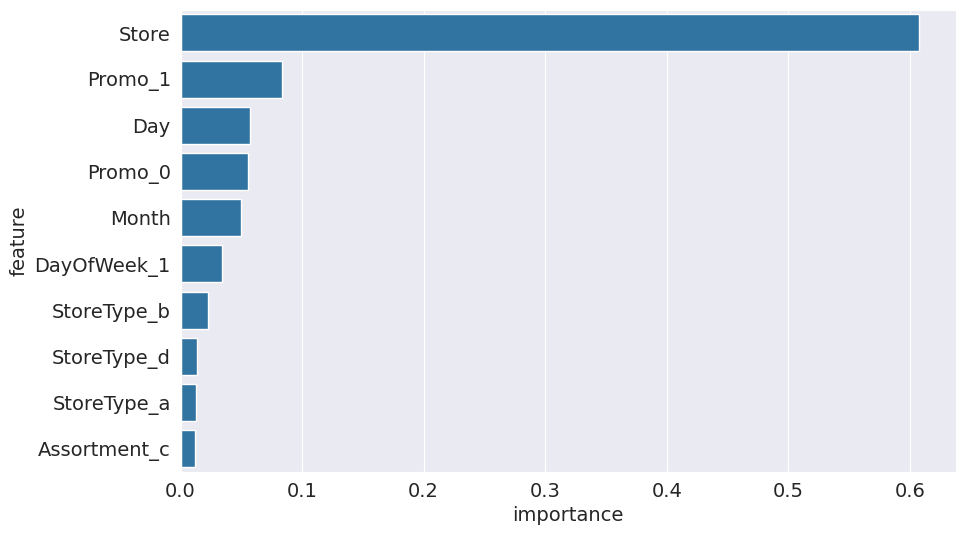

In [318]:
sns.barplot(data= importance_df.head(10),x='importance',y='feature');

In [319]:
X_train.columns

Index(['Store', 'Day', 'Month', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Promo_0',
       'Promo_1', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [320]:
rf.feature_importances_

array([0.60715577, 0.05730092, 0.04993157, 0.03387065, 0.00463422,
       0.0027555 , 0.00259458, 0.0059681 , 0.00688217, 0.00456519,
       0.05545457, 0.08324799, 0.01289758, 0.02263917, 0.01032699,
       0.0132251 , 0.00937356, 0.00523493, 0.01194145])

In [321]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
0,Store,0.607156
11,Promo_1,0.083248
1,Day,0.057301
10,Promo_0,0.055455
2,Month,0.049932
3,DayOfWeek_1,0.033871
13,StoreType_b,0.022639
15,StoreType_d,0.013225
12,StoreType_a,0.012898
18,Assortment_c,0.011941


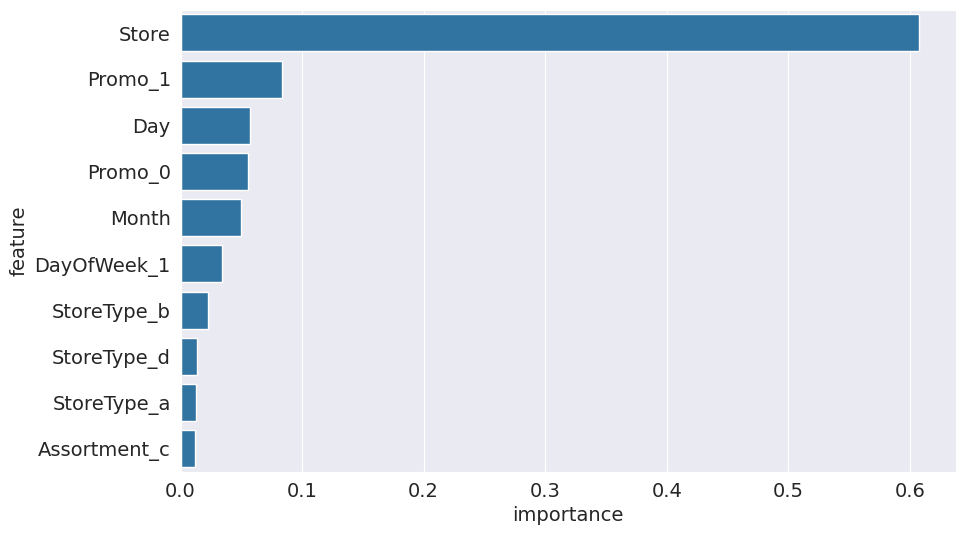

In [322]:
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

In [323]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
0,Store,0.607156
11,Promo_1,0.083248
1,Day,0.057301
10,Promo_0,0.055455
2,Month,0.049932
3,DayOfWeek_1,0.033871
13,StoreType_b,0.022639
15,StoreType_d,0.013225
12,StoreType_a,0.012898
18,Assortment_c,0.011941


In [342]:
def predict_input(model, single_input):
    if single_input.get('Open', 0) == 0:
        return 0.

    # Ensure column names match those used in training
    renamed_input = {
        'storetype': 'StoreType',
        'Assortment': 'Assortment',
        'StateHoliday': 'StateHoliday',
        'Promo2Sinceyear': 'Promo2SinceYear'
    }

    # Rename keys before creating DataFrame
    for old_key, new_key in renamed_input.items():
        if old_key in single_input:
            single_input[new_key] = single_input.pop(old_key)

    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df['Date'])
    input_df['Day'] = input_df['Date'].dt.day
    input_df['Month'] = input_df['Date'].dt.month

    if 'Year' in numeric_cols and 'Year' in model.feature_names_in_:
        input_df['Year'] = input_df['Date'].dt.year

    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

    X_input = input_df[numeric_cols + encoded_cols]
    X_input = X_input[model.feature_names_in_]

    return model.predict(X_input)[0]








In [362]:
sample_input = {
    'Id': 1,
    'Store': 1,
    'DayOfWeek': 4,
    'Date': '2015-09-17 00:00:00',
    'Open': 1.0,
    'Promo': 1,
    'StateHoliday': 'o',
    'SchoolHoliday': 0,
    'storetype': 'c',
    'Assortment': 'a',
    'CompetitionDistance': 1270.0,
    'CompetitionOpenSinceYear': 2008.0,
    'Promo2': 0,
    'Promo2SinceWeek': np.nan,
    'Promo2Sinceyear': np.nan,
    'PromoInterval': np.nan
}


In [363]:
X_test

,Store,Day,Month,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,0.533333,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,0.533333,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,0.533333,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,0.533333,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,0.533333,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.000000,0.636364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.000000,0.636364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.000000,0.636364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.000000,0.636364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [364]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [365]:
test_preds = rf.predict(X_test)
test_preds

array([ 4169.95,  7871.7 ,  8626.05, ...,  6011.4 , 20611.65,  6704.95])

In [366]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [367]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [368]:
submission_df['Sales'] = test_preds

In [369]:
submission_df.fillna(0,inplace=True)

In [370]:
submission_df.to_csv('submission.csv',index=None)

In [371]:
!head submission.csv

Id,Sales
1,4169.95
2,7871.7
3,8626.05
4,6705.55
5,6329.15
6,5692.95
7,8001.45
8,8177.35
9,5479.4


In [372]:
from IPython.display import FileLink

In [373]:
FileLink('submission.csv')

/content/submission.csv